# **COVID-19 Radiography Database**

## **COVID-19 X-Ray Image Classification using Deep Learning:**


## The dataset used for training and validation contains 4 different types of classes:
*   **COVID infected individuals**
*   **Lung Opacity (usually indice of various things like infections, history of smoking, etc)**
*   **Viral Pneumonia**
*   **Normal (No Pathology)**







---



# **Libraries needed**

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import matplotlib.pyplot as plt


# **Auxiliary Functions**

In [ ]:
def show_images(gen):
    '''
    This function takes the data generator and shows sample of the images
    '''
    # return classes , images to be displayed
    g_dict = gen.class_indices        # defines dictionary {'class': index}
    classes = list(g_dict.keys())     # defines list of dictionary's kays (classes), classes names : string
    images, labels = next(gen)        # get a batch size samples from the generator

    # calculate number of displayed samples
    length = len(labels)        # length of batch size
    sample = min(length, 25)    # check if sample less than 25 images

    plt.figure(figsize= (20, 20))

    for i in range(sample):
        plt.subplot(5, 5, i + 1)
        image = images[i]     # no need to rescale
        plt.imshow(image)
        index = np.argmax(labels[i])  # get image index
        class_name = classes[index]   # get class of image
        plt.title(class_name, color= 'blue', fontsize= 12)
        plt.axis('off')
    plt.show()



---



# **Setting Dataset Direcory Path**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/drive/MyDrive/COVID'

Mounted at /content/drive


## **Splitting Data into Training and Validation Sets**

In [4]:
# Define the dimensions for resizing the images
img_width, img_height = 150, 150

# Define batch size for training
batch_size = 32

# Define ImageDataGenerator to preprocess the images
datagen = ImageDataGenerator(
    rescale=1./255,  # rescale pixel values to [0,1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # splitting data into training and validation sets
)

# Generate training data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training' # specify that this is the training set
)

# Generate validation data
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation' # specify that this is the validation set
)


Found 1266 images belonging to 4 classes.
Found 316 images belonging to 4 classes.


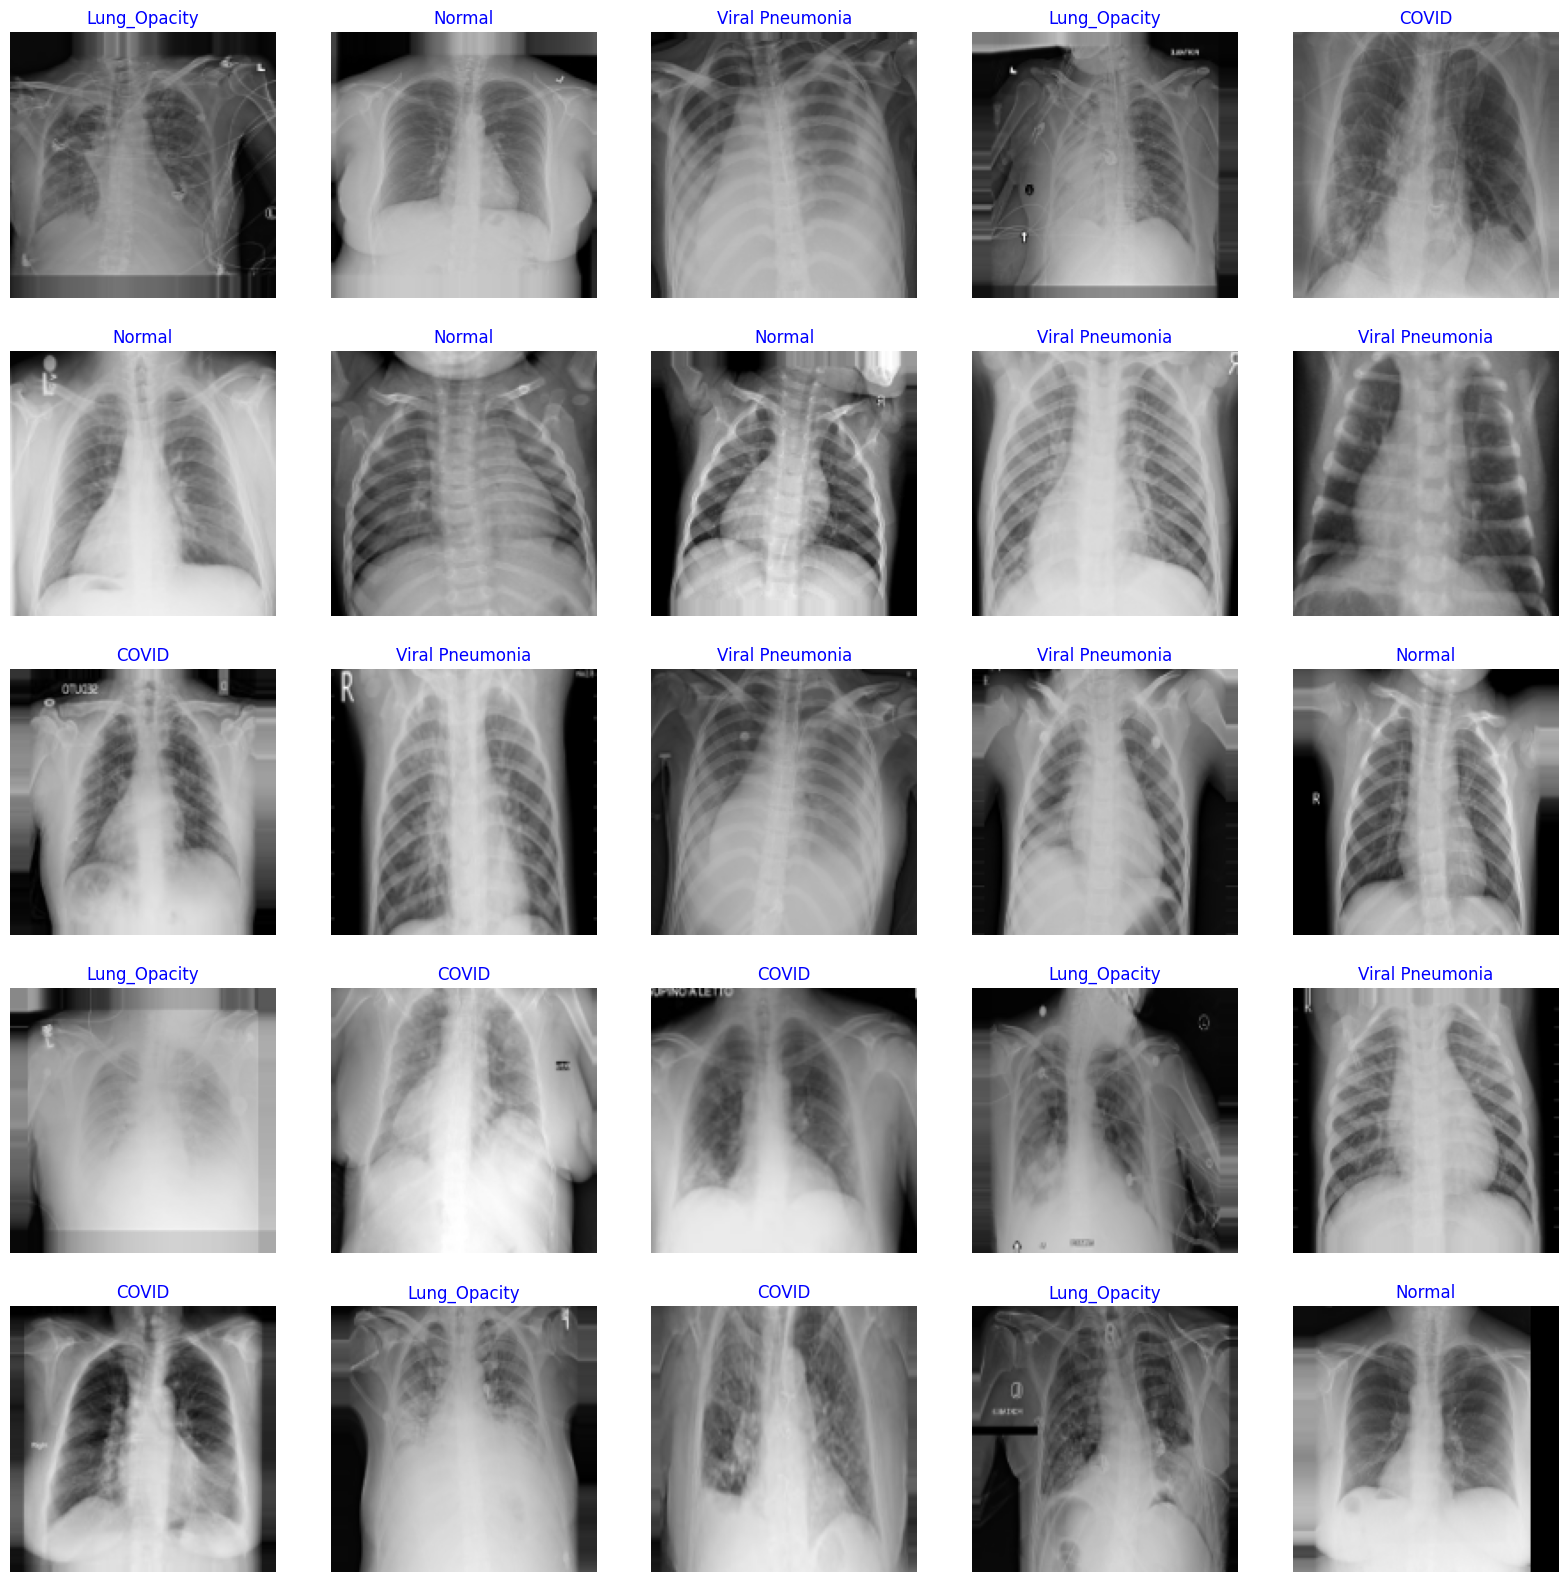

In [ ]:
show_images(train_generator)

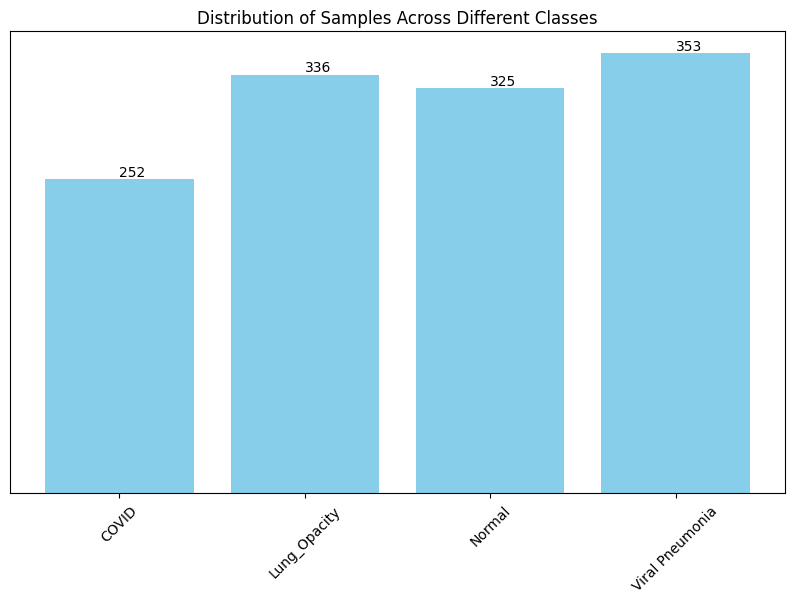

In [10]:
# Get class labels and their corresponding indices
class_indices = train_generator.class_indices

# Reverse the mapping to get class labels from indices
class_labels = {v: k for k, v in class_indices.items()}

# Count the number of samples for each class in the training set
num_samples = {class_label: 0 for class_label in class_labels.values()}
for class_index in train_generator.classes:
    class_label = class_labels[class_index]
    num_samples[class_label] += 1

# Plot the distribution of samples across different classes
plt.figure(figsize=(10, 6))
bars = plt.bar(num_samples.keys(), num_samples.values(), color='skyblue')

# Add text labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), va='bottom')

plt.xlabel('')
plt.title('Distribution of Samples Across Different Classes')

# Remove Y axis ticks
plt.yticks([])

plt.xticks(rotation=45)
plt.show()


# **Creating CNN Model**

In [ ]:
# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the summary of the model
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 17, 17, 128)      

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Epoch 1/20
40/40 [==============================] - 17s 418ms/step - loss: 0.5622 - accuracy: 0.7717 - val_loss: 0.5020 - val_accuracy: 0.8165
Epoch 2/20
40/40 [==============================] - 17s 436ms/step - loss: 0.6023 - accuracy: 0.7457 - val_loss: 0.4784 - val_accuracy: 0.8196
Epoch 3/20
40/40 [==============================] - 16s 409ms/step - loss: 0.5742 - accuracy: 0.7820 - val_loss: 0.5738 - val_accuracy: 0.7880
Epoch 4/20
40/40 [==============================] - 16s 403ms/step - loss: 0.5947 - accuracy: 0.7717 - val_loss: 0.5078 - val_accuracy: 0.8101
Epoch 5/20
40/40 [==============================] - 16s 410ms/step - loss: 0.5116 - accuracy: 0.7836 - val_loss: 0.5424 - val_accuracy: 0.7911
Epoch 6/20
40/40 [==============================] - 19s 467ms/step - loss: 0.5465 - accuracy: 0.7883 - val_loss: 0.5193 - val_accuracy: 0.8070
Epoch 7/20
40/40 [==============================] - 17s 417ms/step - loss: 0.4837 - accuracy: 0.8144 - val_loss: 0.4241 - val_accuracy: 0.8133

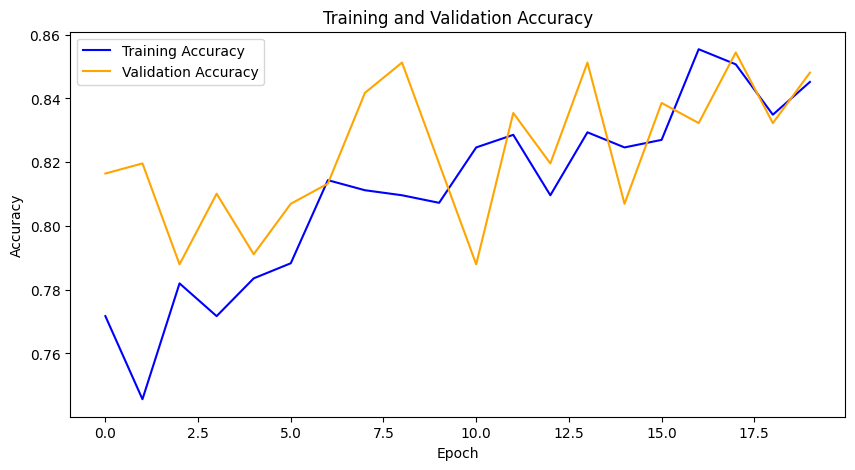

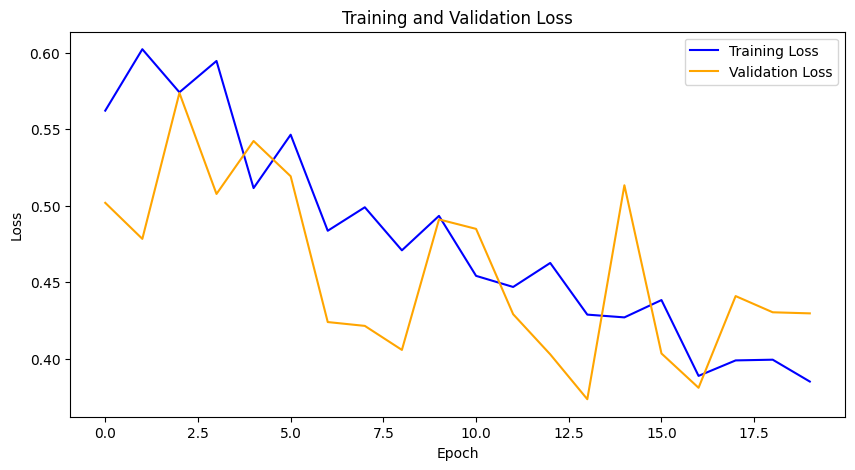

In [ ]:
# Get training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(validation_generator)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


10/10 [==============================] - 5s 380ms/step - loss: 0.4091 - accuracy: 0.8449
Test Loss: 0.4090559780597687
Test Accuracy: 0.844936728477478


## **Analysing results of the CNN model**

**Test Loss:** Indicates that on average the model's predictions deviate from the actual labels approximately **0.4091 units**. Lower values of test loss are desirable.

**Test Accuracy:** The model correctly classified around 84,49% of the samples in the test dataset. Higher accuracy values are desirable.

**Overfitting:** It is not immediately apparent whether there is overfitting or not.



**Overall, the model performed reasonably well, with a low relatively low test loss and a moderate accuracy.**

## **Predictions**

In [ ]:
num_validation_samples = len(validation_generator)
print("Number of samples in the validation set:", num_validation_samples)


Number of samples in the validation set: 10


1/1 [==============================] - 0s 21ms/step


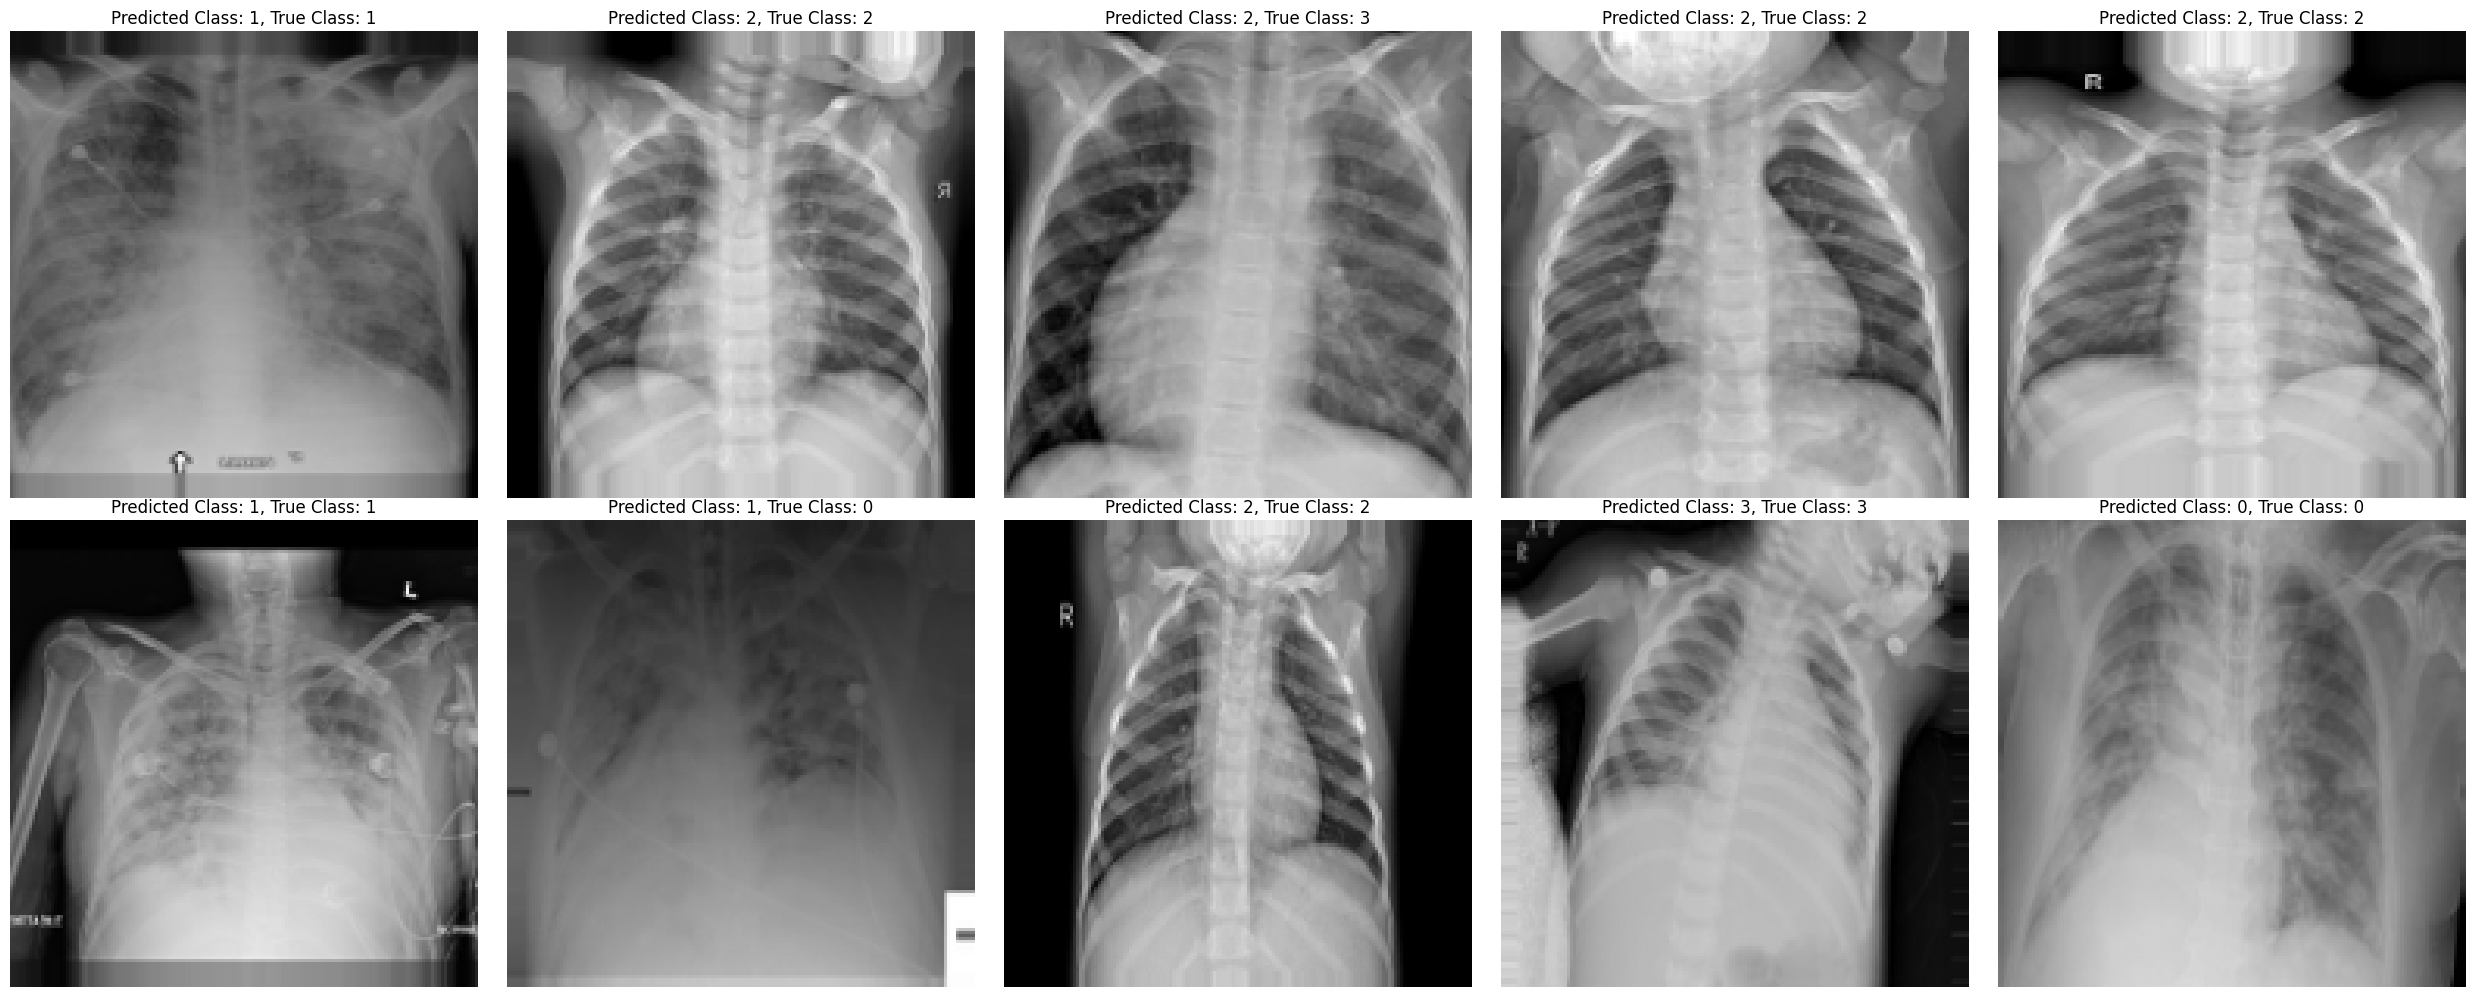

In [ ]:
# Define the number of rows and columns for subplot layout
num_rows = 2
num_cols = num_examples // num_rows

# Create a figure with the specified subplot layout
plt.figure(figsize=(num_cols * 5, num_rows * 5))

# Iterate over the selected indices
for i, idx in enumerate(random_indices):
    # Get a batch of images and labels from the validation generator
    images, labels = next(validation_generator)

    # Make predictions
    predictions = model.predict(images)

    # Select the corresponding image and label from the batch
    selected_image = images[0]  # Assuming batch size is 1
    selected_label = np.argmax(labels[0])  # Assuming one-hot encoded labels

    # Get the predicted class index
    predicted_class_idx = np.argmax(predictions[0])

    # Plot the image and prediction in the subplot
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(selected_image)
    plt.axis('off')
    plt.title(f'Predicted Class: {predicted_class_idx}, True Class: {selected_label}')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
# Get the class indices from the validation generator
class_indices = validation_generator.class_indices

# Print the class indices
print(class_indices)


{'COVID': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}


# **Conclusion**

## With these examples, the model predicted 80% of the correct classes.
To increase accuracy:


*  More samples can be used to train the model
*  Fine-tuning the model archutecture, such as: increasing layers on the CNN model and data augmentation (artificially increase the diversity of the training data)

